In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import linregress

In [2]:
stock_data = pd.read_csv('vn30_index_stocks.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d/%m/%Y')
stock_data.set_index('Date', inplace= True)
stock_data

VNI30      ACB      BID    BVH      CTG       FPT     GAS  \
Date                                                                      
2019-06-03   864.08  10868.6  23419.5  77300  14837.3   25410.9  101400   
2019-06-04   864.35  10830.8  24491.0  77800  14911.8   25294.1  102000   
2019-06-05   863.69  10944.4  24031.8  77800  14986.4   25469.3  102000   
2019-06-06   861.31  10792.9  23955.2  77800  15135.5   25995.1   99800   
2019-06-07   869.56  10868.6  24261.4  78300  15247.4   26404.0  103000   
...             ...      ...      ...    ...      ...       ...     ...   
2024-05-27  1284.88  29450.0  48900.0  46400  32400.0  132800.0   81000   
2024-05-28  1299.75  29650.0  49100.0  47000  32200.0  137000.0   81900   
2024-05-29  1284.02  29250.0  48600.0  45600  31650.0  135700.0   82200   
2024-05-30  1279.29  25565.2  47700.0  45000  31800.0  135000.0   81100   
2024-05-31  1275.97  24650.0  47100.0  44850  31900.0  134600.0   80100   

              GVR      HDB      HPG  ...    STB    TCB      TPB    VCB    VHM  \
Date                                 ...                                        
2019-06-03  11425  10375.7  11086.0  ...  11600  21500  14429.2  51067  60601   
2019-06-04  11425  10317.6  11117.7  ...  11600  21200  14429.2  51605  60601   
2019-06-05  11425  10433.9  10888.9  ...  11650  21300  14489.8  51221  60601   
2019-06-06  12213  10395.1  10385.7  ...  11550  21350  14489.8  50606  60376   
2019-06-07  13297  10433.9  10500.0  ...  11750  21600  14611.1  50376  61804   
...           ...      ...      ...  ...    ...    ...      ...    ...    ...   
2024-05-27  35250  23800.0  28900.0  ...  28700  46500  17700.0  90200  39800   
2024-05-28  35600  24150.0  29150.0  ...  28850  46900  17850.0  90700  39950   
2024-05-29  34900  23450.0  28600.0  ...  28250  46500  17700.0  89800  39450   
2024-05-30  36000  23100.0  28250.0  ...  27850  46800  17700.0  88600  39000   
2024-05-31  35150  23250.0  28600.0  ...  27850  47000  17650.0  87200  38850   

               VIC     VJC       VNM      VPB    VRE  
Date                                                  
2019-06-03  114500  122000  100168.0   6666.7  33800  
2019-06-04  114600  121300  100637.0   6666.7  34300  
2019-06-05  115900  121400  100954.0   6611.2  34350  
2019-06-06  115900  121400  100162.0   6648.2  34450  
2019-06-07  117000  122200  100241.0   6648.2  34750  
...            ...     ...       ...      ...    ...  
2024-05-27   45050  109000   66100.0  18000.0  22300  
2024-05-28   45050  109600   66800.0  18050.0  22450  
2024-05-29   44400  107900   66300.0  18050.0  22150  
2024-05-30   43150  107000   65700.0  17950.0  21600  
2024-05-31   43550  107100   65400.0  18000.0  21750  

[1251 rows x 31 columns]

In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1251 entries, 2019-06-03 to 2024-05-31
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VNI30   1251 non-null   float64
 1   ACB     1251 non-null   float64
 2   BID     1251 non-null   float64
 3   BVH     1251 non-null   int64  
 4   CTG     1251 non-null   float64
 5   FPT     1251 non-null   float64
 6   GAS     1251 non-null   int64  
 7   GVR     1251 non-null   int64  
 8   HDB     1251 non-null   float64
 9   HPG     1251 non-null   float64
 10  KDH     1251 non-null   float64
 11  MBB     1251 non-null   float64
 12  MSN     1251 non-null   int64  
 13  MWG     1251 non-null   int64  
 14  NVL     1251 non-null   int64  
 15  PDR     1251 non-null   float64
 16  PLX     1251 non-null   int64  
 17  PNJ     1251 non-null   float64
 18  POW     1251 non-null   float64
 19  SAB     1251 non-null   int64  
 20  SSI     1251 non-null   float64
 21  STB     1251 non-nu

In [4]:
stock_data = stock_data.astype(float)

In [5]:
fig = px.line(stock_data, x= stock_data.index, y= stock_data.columns[1:], title= 'Stock Closing Prices Over Time', width= 1400, height= 800)
fig.show()

In [6]:
plot_cumulative_returns = (stock_data.pct_change() + 1).cumprod()

fig = px.line(plot_cumulative_returns, x= plot_cumulative_returns.index, y= plot_cumulative_returns.columns[1:], title= 'Stock Cumulative Returns Over Time', width= 1400, height= 800)
fig.show()

In [7]:
stock_data_pct_change = stock_data.pct_change()
stock_data_pct_change = stock_data_pct_change.iloc[1:]
stock_data_pct_change.to_excel('CAPM.xlsx')

In [8]:
stock_data_pct_change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1250 entries, 2019-06-04 to 2024-05-31
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VNI30   1250 non-null   float64
 1   ACB     1250 non-null   float64
 2   BID     1250 non-null   float64
 3   BVH     1250 non-null   float64
 4   CTG     1250 non-null   float64
 5   FPT     1250 non-null   float64
 6   GAS     1250 non-null   float64
 7   GVR     1250 non-null   float64
 8   HDB     1250 non-null   float64
 9   HPG     1250 non-null   float64
 10  KDH     1250 non-null   float64
 11  MBB     1250 non-null   float64
 12  MSN     1250 non-null   float64
 13  MWG     1250 non-null   float64
 14  NVL     1250 non-null   float64
 15  PDR     1250 non-null   float64
 16  PLX     1250 non-null   float64
 17  PNJ     1250 non-null   float64
 18  POW     1250 non-null   float64
 19  SAB     1250 non-null   float64
 20  SSI     1250 non-null   float64
 21  STB     1250 non-nu

## Capital Asset Pricing Model

In [9]:
# Set market expected return and risk-free rate
market_expected_return = stock_data_pct_change['VNI30'].mean()*252
rfr = 0.02833 # Vietnam 10-Year government bond yield as of June 2024

In [10]:
beta_values = []
expected_returns = []
stock_list = stock_data_pct_change.drop(columns=['VNI30']).columns

for stock in stock_list:
    slope, intercept, r_value, p_value, std_err = linregress(stock_data_pct_change['VNI30'], stock_data_pct_change[stock])
    beta = slope
    # Alternative method: beta = (stock_data_pct_change[[stock,'VNI30']].cov()/stock_data_pct_change['VNI30'].var()).iloc[0].iloc[1]
    expected_return = rfr + beta * (market_expected_return - rfr)

    beta_values.append(beta)
    expected_returns.append(expected_return)

result = pd.DataFrame({'Stock': stock_list, 'Beta': beta_values, 'Expected Return': expected_returns})
result

Stock      Beta  Expected Return
0    ACB  1.043761         0.105132
1    BID  1.131403         0.111581
2    BVH  0.992328         0.101347
3    CTG  1.242595         0.119763
4    FPT  0.919854         0.096015
5    GAS  0.842717         0.090339
6    GVR  1.241661         0.119694
7    HDB  1.038103         0.104716
8    HPG  1.207159         0.117155
9    KDH  0.947885         0.098077
10   MBB  1.241945         0.119715
11   MSN  1.000694         0.101963
12   MWG  1.173296         0.114663
13   NVL  0.591369         0.071844
14   PDR  0.749400         0.083472
15   PLX  0.874806         0.092700
16   PNJ  0.887264         0.093617
17   POW  1.011110         0.102729
18   SAB  0.571944         0.070415
19   SSI  1.509268         0.139385
20   STB  1.373873         0.129422
21   TCB  1.309816         0.124709
22   TPB  1.023848         0.103667
23   VCB  0.768167         0.084853
24   VHM  0.972332         0.099876
25   VIC  0.764138         0.084557
26   VJC  0.480133         0.063659
27   VNM  0.621248         0.074043
28   VPB  1.226375         0.118569
29   VRE  1.102758         0.109473

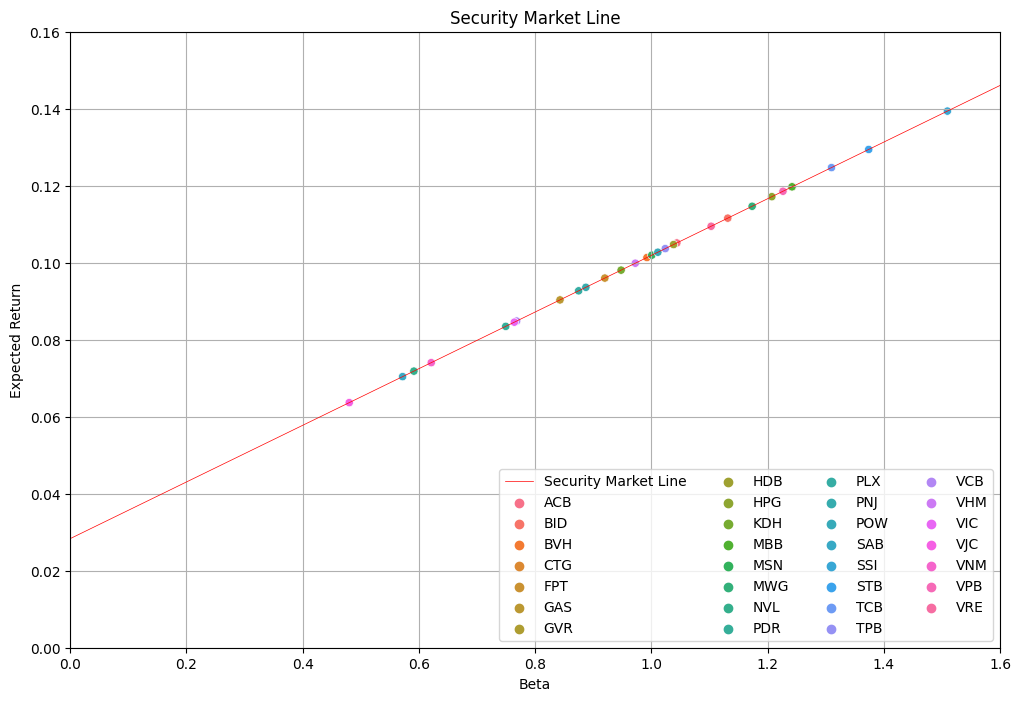

In [11]:
extended_x = 2
slope = (market_expected_return - rfr) / 1  # Slope = (change in y) / (change in x)
extended_y = slope * 2 + rfr

plt.figure(figsize= (12, 8))
plt.plot([0, 1, extended_x], [rfr, market_expected_return, extended_y], label='Security Market Line', color= 'red', linestyle= '-', linewidth= 0.5)
sns.scatterplot(data= result, x= 'Beta', y= 'Expected Return', hue= 'Stock')
plt.title('Security Market Line')
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.legend(loc='lower right', ncol= 4)
plt.grid(True)

plt.xlim(0, 1.6)
plt.ylim(0, 0.16)
plt.show()


## Risk-Return Analysis

### Last 1 Year

In [12]:
start_date = '2023-06-01'
end_date = '2024-05-31'

stock_data_pct_change_1y = stock_data_pct_change.loc[start_date:end_date]
stock_data_pct_change_1y

VNI30       ACB       BID       BVH       CTG       FPT  \
Date                                                                     
2023-06-01  0.001651  0.008625 -0.002279  0.003438 -0.001784 -0.007127   
2023-06-02  0.017667  0.018692  0.018226  0.010325  0.025043  0.003589   
2023-06-05  0.003790 -0.002294  0.000000  0.009058  0.003491  0.014318   
2023-06-06  0.010302  0.002299  0.002244  0.010128 -0.001737  0.003539   
2023-06-07  0.003048  0.002294 -0.010036 -0.006677  0.006969 -0.003527   
...              ...       ...       ...       ...       ...       ...   
2024-05-27  0.001106  0.006838 -0.006098  0.040359 -0.003077  0.006823   
2024-05-28  0.011573  0.006791  0.004090  0.012931 -0.006173  0.031627   
2024-05-29 -0.012102 -0.013491 -0.010183 -0.029787 -0.017081 -0.009489   
2024-05-30 -0.003684 -0.125976 -0.018519 -0.013158  0.004739 -0.005158   
2024-05-31 -0.002595 -0.035799 -0.012579 -0.003333  0.003145 -0.002963   

                 GAS       GVR       HDB       HPG  ...       STB       TCB  \
Date                                                ...                       
2023-06-01 -0.008629  0.032967  0.010875  0.009443  ...  0.010830  0.011686   
2023-06-02  0.000000  0.005319  0.024175  0.009304  ...  0.010714  0.062706   
2023-06-05  0.021746 -0.029101  0.000000  0.002343  ... -0.008834 -0.009317   
2023-06-06  0.011693  0.021798  0.007908  0.004624  ...  0.008913  0.025078   
2023-06-07 -0.006302 -0.010667 -0.010422  0.039043  ...  0.001767 -0.003058   
...              ...       ...       ...       ...  ...       ...       ...   
2024-05-27  0.025316  0.029197 -0.016529  0.000000  ...  0.000000  0.002155   
2024-05-28  0.011111  0.009929  0.014706  0.008651  ...  0.005226  0.008602   
2024-05-29  0.003663 -0.019663 -0.028986 -0.018868  ... -0.020797 -0.008529   
2024-05-30 -0.013382  0.031519 -0.014925 -0.012238  ... -0.014159  0.006452   
2024-05-31 -0.012330 -0.023611  0.006494  0.012389  ...  0.000000  0.004274   

                 TPB       VCB       VHM       VIC       VJC       VNM  \
Date                                                                     
2023-06-01  0.045989 -0.001068 -0.009346  0.000000  0.000000  0.000000   
2023-06-02  0.005749  0.010653  0.007547  0.000000 -0.007179 -0.003025   
2023-06-05 -0.007621  0.032667  0.005618  0.001923  0.000000  0.009105   
2023-06-06 -0.011466  0.010195  0.024209  0.021113  0.009298 -0.001504   
2023-06-07  0.017426 -0.020196  0.005455 -0.007519 -0.011259 -0.003012   
...              ...       ...       ...       ...       ...       ...   
2024-05-27 -0.002817  0.000000  0.000000  0.002225  0.009259  0.001515   
2024-05-28  0.008475  0.005543  0.003769  0.000000  0.005505  0.010590   
2024-05-29 -0.008403 -0.009923 -0.012516 -0.014428 -0.015511 -0.007485   
2024-05-30  0.000000 -0.013363 -0.011407 -0.028153 -0.008341 -0.009050   
2024-05-31 -0.002825 -0.015801 -0.003846  0.009270  0.000935 -0.004566   

                 VPB       VRE  
Date                            
2023-06-01  0.005181 -0.009225  
2023-06-02  0.023198  0.009311  
2023-06-05 -0.005038  0.000000  
2023-06-06  0.005063  0.009225  
2023-06-07  0.002516 -0.003656  
...              ...       ...  
2024-05-27  0.000000  0.000000  
2024-05-28  0.002778  0.006726  
2024-05-29  0.000000 -0.013363  
2024-05-30 -0.005540 -0.024831  
2024-05-31  0.002786  0.006944  

[250 rows x 31 columns]

In [13]:
ann_ret_1y = stock_data_pct_change_1y.mean() * 252
ann_std_1y = stock_data_pct_change_1y.std() * np.sqrt(252)
ex_ret_1y = ann_ret_1y - rfr

stock_ret_std_1y = pd.DataFrame([ann_ret_1y, ann_std_1y, ex_ret_1y], index= ['Annualised Return', 'Annualised Volatility', 'Excess Return']).transpose()
stock_ret_std_1y

Annualised Return  Annualised Volatility  Excess Return
VNI30           0.196736               0.177354       0.168406
ACB             0.180415               0.239347       0.152085
BID             0.224742               0.267284       0.196412
BVH             0.076739               0.209367       0.048409
CTG             0.280570               0.272967       0.252240
FPT             0.665837               0.239070       0.637507
GAS             0.093087               0.209325       0.064757
GVR             0.755811               0.428264       0.727481
HDB             0.401929               0.224204       0.373599
HPG             0.436242               0.276372       0.407912
KDH             0.341965               0.304827       0.313635
MBB             0.373331               0.234996       0.345001
MSN             0.118717               0.335679       0.090387
MWG             0.565712               0.368777       0.537382
NVL             0.172288               0.455782       0.143958
PDR             0.755406               0.453026       0.727076
PLX             0.179880               0.259938       0.151550
PNJ             0.335013               0.231257       0.306683
POW            -0.054064               0.231155      -0.082394
SAB            -0.239544               0.257364      -0.267874
SSI             0.516659               0.372795       0.488329
STB             0.047719               0.291036       0.019389
TCB             0.495646               0.287499       0.467316
TPB             0.015922               0.259636      -0.012408
VCB             0.111719               0.199616       0.083389
VHM            -0.275745               0.305331      -0.304075
VIC            -0.120535               0.341997      -0.148865
VJC             0.121155               0.232111       0.092825
VNM             0.059689               0.186658       0.031359
VPB             0.060586               0.245892       0.032256
VRE            -0.165568               0.335103      -0.193898

In [14]:
fig = px.scatter(stock_ret_std_1y, x= 'Annualised Volatility', y= 'Excess Return', color= stock_ret_std_1y.index,
                 title= 'Risk-Return of Last 1 Year', width= 1400, height= 800)

for i, trace in enumerate(fig.data):
    if stock_ret_std_1y.index[i] == 'VNI30':
        trace.marker.color = 'black'
        trace.marker.size = 20
    else:
        trace.marker.size = 8

fig.update_layout(xaxis_title= 'Annualised Volatility', yaxis_title= 'Excess Return')
fig.update_xaxes(range=[0, 0.6])
fig.update_yaxes(range=[-0.6, 0.8])
fig.show()

### Last 3 Years

In [15]:
start_date = '2021-06-01'
end_date = '2024-05-31'

stock_data_pct_change_3y = stock_data_pct_change.loc[start_date:end_date]
stock_data_pct_change_3y

VNI30       ACB       BID       BVH       CTG       FPT  \
Date                                                                     
2021-06-01  0.005519  0.016908 -0.014374 -0.009235 -0.009415  0.032310   
2021-06-02 -0.002745  0.059382 -0.012498  0.000000 -0.011408 -0.018368   
2021-06-03  0.017257  0.029148  0.029536  0.024251  0.030771 -0.003516   
2021-06-04  0.002646 -0.013072  0.004096  0.040066  0.007462 -0.005861   
2021-06-07 -0.016077 -0.050773 -0.044897  0.024527 -0.037038 -0.023625   
...              ...       ...       ...       ...       ...       ...   
2024-05-27  0.001106  0.006838 -0.006098  0.040359 -0.003077  0.006823   
2024-05-28  0.011573  0.006791  0.004090  0.012931 -0.006173  0.031627   
2024-05-29 -0.012102 -0.013491 -0.010183 -0.029787 -0.017081 -0.009489   
2024-05-30 -0.003684 -0.125976 -0.018519 -0.013158  0.004739 -0.005158   
2024-05-31 -0.002595 -0.035799 -0.012579 -0.003333  0.003145 -0.002963   

                 GAS       GVR       HDB       HPG  ...       STB       TCB  \
Date                                                ...                       
2021-06-01  0.013317 -0.008759  0.014793  0.053131  ... -0.041420 -0.011173   
2021-06-02  0.044199 -0.017637 -0.008746 -0.027026  ... -0.006173 -0.005650   
2021-06-03  0.010294  0.023336  0.052941  0.005554  ...  0.017081  0.037879   
2021-06-04  0.035116  0.049139 -0.009777  0.003684  ... -0.018321 -0.003650   
2021-06-07 -0.007664  0.050168 -0.022567 -0.033028  ... -0.045101 -0.040293   
...              ...       ...       ...       ...  ...       ...       ...   
2024-05-27  0.025316  0.029197 -0.016529  0.000000  ...  0.000000  0.002155   
2024-05-28  0.011111  0.009929  0.014706  0.008651  ...  0.005226  0.008602   
2024-05-29  0.003663 -0.019663 -0.028986 -0.018868  ... -0.020797 -0.008529   
2024-05-30 -0.013382  0.031519 -0.014925 -0.012238  ... -0.014159  0.006452   
2024-05-31 -0.012330 -0.023611  0.006494  0.012389  ...  0.000000  0.004274   

                 TPB       VCB       VHM       VIC       VJC       VNM  \
Date                                                                     
2021-06-01  0.009320  0.051732  0.013644  0.021284 -0.034545 -0.006630   
2021-06-02 -0.015852  0.022171  0.003850 -0.020841  0.003766 -0.005561   
2021-06-03  0.028229  0.006605  0.009574  0.008512  0.002814  0.008948   
2021-06-04  0.019582 -0.016863 -0.008534  0.021104  0.004677 -0.007760   
2021-06-07 -0.046132 -0.018113  0.014354  0.016522  0.040968 -0.001117   
...              ...       ...       ...       ...       ...       ...   
2024-05-27 -0.002817  0.000000  0.000000  0.002225  0.009259  0.001515   
2024-05-28  0.008475  0.005543  0.003769  0.000000  0.005505  0.010590   
2024-05-29 -0.008403 -0.009923 -0.012516 -0.014428 -0.015511 -0.007485   
2024-05-30  0.000000 -0.013363 -0.011407 -0.028153 -0.008341 -0.009050   
2024-05-31 -0.002825 -0.015801 -0.003846  0.009270  0.000935 -0.004566   

                 VPB       VRE  
Date                            
2021-06-01  0.001448  0.044218  
2021-06-02  0.012986 -0.019544  
2021-06-03  0.005696  0.013289  
2021-06-04  0.015584  0.055738  
2021-06-07  0.004184  0.035714  
...              ...       ...  
2024-05-27  0.000000  0.000000  
2024-05-28  0.002778  0.006726  
2024-05-29  0.000000 -0.013363  
2024-05-30 -0.005540 -0.024831  
2024-05-31  0.002786  0.006944  

[750 rows x 31 columns]

In [16]:
ann_ret_3y = stock_data_pct_change_3y.mean() * 252
ann_std_3y = stock_data_pct_change_3y.std() * np.sqrt(252)
ex_ret_3y = ann_ret_3y - rfr

stock_ret_std_3y = pd.DataFrame([ann_ret_3y, ann_std_3y, ex_ret_3y], index= ['Annualised Return', 'Annualised Volatility', 'Excess Return']).transpose()
stock_ret_std_3y

Annualised Return  Annualised Volatility  Excess Return
VNI30          -0.025801               0.213284      -0.054131
ACB             0.026312               0.315177      -0.002018
BID             0.127270               0.345722       0.098940
BVH             0.011167               0.309220      -0.017163
CTG            -0.016054               0.349450      -0.044384
FPT             0.265126               0.279408       0.236796
GAS             0.071899               0.350454       0.043569
GVR             0.189584               0.470932       0.161254
HDB             0.076908               0.323674       0.048578
HPG            -0.043350               0.369922      -0.071680
KDH             0.105267               0.374336       0.076937
MBB             0.031378               0.334975       0.003048
MSN             0.016006               0.377615      -0.012324
MWG             0.182709               0.379482       0.154379
NVL            -0.464166               0.427192      -0.492496
PDR            -0.173170               0.441762      -0.201500
PLX            -0.023703               0.320668      -0.052033
PNJ             0.128851               0.302601       0.100521
POW             0.102345               0.382656       0.074015
SAB            -0.210428               0.397412      -0.238758
SSI             0.198307               0.464577       0.169977
STB             0.015988               0.402360      -0.012342
TCB             0.015746               0.347357      -0.012584
TPB            -0.039949               0.384931      -0.068279
VCB             0.080112               0.264899       0.051782
VHM            -0.174908               0.315922      -0.203238
VIC            -0.245072               0.312670      -0.273402
VJC             0.020805               0.245042      -0.007525
VNM            -0.056680               0.218803      -0.085010
VPB            -0.065292               0.326252      -0.093622
VRE            -0.030496               0.376136      -0.058826

In [17]:
fig = px.scatter(stock_ret_std_3y, x= 'Annualised Volatility', y= 'Excess Return', color= stock_ret_std_3y.index,
                 title= 'Risk-Return of Last 3 Years', width= 1400, height= 800)

for i, trace in enumerate(fig.data):
    if stock_ret_std_3y.index[i] == 'VNI30':
        trace.marker.color = 'black'
        trace.marker.size = 20
    else:
        trace.marker.size = 8

fig.update_layout(xaxis_title= 'Annualised Volatility', yaxis_title= 'Excess Return')
fig.update_xaxes(range=[0, 0.6])
fig.update_yaxes(range=[-0.6, 0.8])
fig.show()

### Last 5 Years

In [18]:
ann_ret = stock_data_pct_change.mean() * 252
ann_std = stock_data_pct_change.std() * np.sqrt(252)
ex_ret = ann_ret - rfr

stock_ret_std = pd.DataFrame([ann_ret, ann_std, ex_ret], index= ['Annualised Return', 'Annualised Volatility', 'Excess Return']).transpose()
stock_ret_std

Annualised Return  Annualised Volatility  Excess Return
VNI30           0.101912               0.215249       0.073582
ACB             0.215337               0.315027       0.187007
BID             0.201432               0.347359       0.173102
BVH            -0.052896               0.336760      -0.081226
CTG             0.217638               0.355259       0.189308
FPT             0.376943               0.284255       0.348613
GAS             0.012115               0.342540      -0.016215
GVR             0.338913               0.473278       0.310583
HDB             0.217079               0.329223       0.188749
HPG             0.255636               0.359311       0.227306
KDH             0.196399               0.338047       0.168069
MBB             0.210488               0.327771       0.182158
MSN             0.049336               0.373803       0.021006
MWG             0.232927               0.360849       0.204597
NVL            -0.102507               0.363077      -0.130837
PDR             0.185608               0.412987       0.157278
PLX            -0.030761               0.316421      -0.059091
PNJ             0.165001               0.310665       0.136671
POW             0.031902               0.373012       0.003572
SAB            -0.225231               0.368419      -0.253561
SSI             0.295695               0.438554       0.267365
STB             0.255393               0.397054       0.227063
TCB             0.216851               0.343423       0.188521
TPB             0.108978               0.364814       0.080648
VCB             0.146529               0.277145       0.118199
VHM            -0.039170               0.317826      -0.067500
VIC            -0.147026               0.309293      -0.175356
VJC             0.003859               0.245808      -0.024471
VNM            -0.056829               0.241429      -0.085159
VPB             0.260796               0.347346       0.232466
VRE            -0.020666               0.369109      -0.048996

In [19]:
fig = px.scatter(stock_ret_std, x= 'Annualised Volatility', y= 'Excess Return', color= stock_ret_std.index,
                 title= 'Risk-Return of Last 5 Years', width= 1400, height= 800)

for i, trace in enumerate(fig.data):
    if stock_ret_std.index[i] == 'VNI30':
        trace.marker.color = 'black'
        trace.marker.size = 20
    else:
        trace.marker.size = 8

fig.update_layout(xaxis_title= 'Annualised Volatility', yaxis_title= 'Excess Return')
fig.update_xaxes(range=[0, 0.6])
fig.update_yaxes(range=[-0.6, 0.8])
fig.show()

In [20]:
stock_ret_std['Sharpe Ratio'] = stock_ret_std['Excess Return'] / stock_ret_std['Annualised Volatility']
sharpe_ratio = stock_ret_std.sort_values(by= 'Sharpe Ratio', ascending= False)
sharpe_ratio

Annualised Return  Annualised Volatility  Excess Return  Sharpe Ratio
FPT             0.376943               0.284255       0.348613      1.226406
VPB             0.260796               0.347346       0.232466      0.669263
GVR             0.338913               0.473278       0.310583      0.656237
HPG             0.255636               0.359311       0.227306      0.632615
SSI             0.295695               0.438554       0.267365      0.609652
ACB             0.215337               0.315027       0.187007      0.593624
HDB             0.217079               0.329223       0.188749      0.573316
STB             0.255393               0.397054       0.227063      0.571869
MWG             0.232927               0.360849       0.204597      0.566987
MBB             0.210488               0.327771       0.182158      0.555748
TCB             0.216851               0.343423       0.188521      0.548947
CTG             0.217638               0.355259       0.189308      0.532874
BID             0.201432               0.347359       0.173102      0.498337
KDH             0.196399               0.338047       0.168069      0.497176
PNJ             0.165001               0.310665       0.136671      0.439929
VCB             0.146529               0.277145       0.118199      0.426489
PDR             0.185608               0.412987       0.157278      0.380831
VNI30           0.101912               0.215249       0.073582      0.341846
TPB             0.108978               0.364814       0.080648      0.221067
MSN             0.049336               0.373803       0.021006      0.056195
POW             0.031902               0.373012       0.003572      0.009577
GAS             0.012115               0.342540      -0.016215     -0.047339
VJC             0.003859               0.245808      -0.024471     -0.099553
VRE            -0.020666               0.369109      -0.048996     -0.132740
PLX            -0.030761               0.316421      -0.059091     -0.186749
VHM            -0.039170               0.317826      -0.067500     -0.212381
BVH            -0.052896               0.336760      -0.081226     -0.241199
VNM            -0.056829               0.241429      -0.085159     -0.352728
NVL            -0.102507               0.363077      -0.130837     -0.360356
VIC            -0.147026               0.309293      -0.175356     -0.566958
SAB            -0.225231               0.368419      -0.253561     -0.688241

In [21]:
stock_list_10 = ['ACB', 'FPT', 'GVR', 'HDB', 'HPG', 'MBB', 'MWG', 'SSI', 'STB', 'VPB']
stock_10 = stock_data_pct_change[stock_list_10]
stock_10.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1250 entries, 2019-06-04 to 2024-05-31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACB     1250 non-null   float64
 1   FPT     1250 non-null   float64
 2   GVR     1250 non-null   float64
 3   HDB     1250 non-null   float64
 4   HPG     1250 non-null   float64
 5   MBB     1250 non-null   float64
 6   MWG     1250 non-null   float64
 7   SSI     1250 non-null   float64
 8   STB     1250 non-null   float64
 9   VPB     1250 non-null   float64
dtypes: float64(10)
memory usage: 139.7 KB


In [22]:
plot_stock_10 = stock_data[stock_list_10]
fig = px.line(plot_stock_10, x= plot_stock_10.index, y= plot_stock_10.columns, title= 'Stock Closing Prices Over Time', width= 1400, height= 800)
fig.show()

## Correlation-Covariance

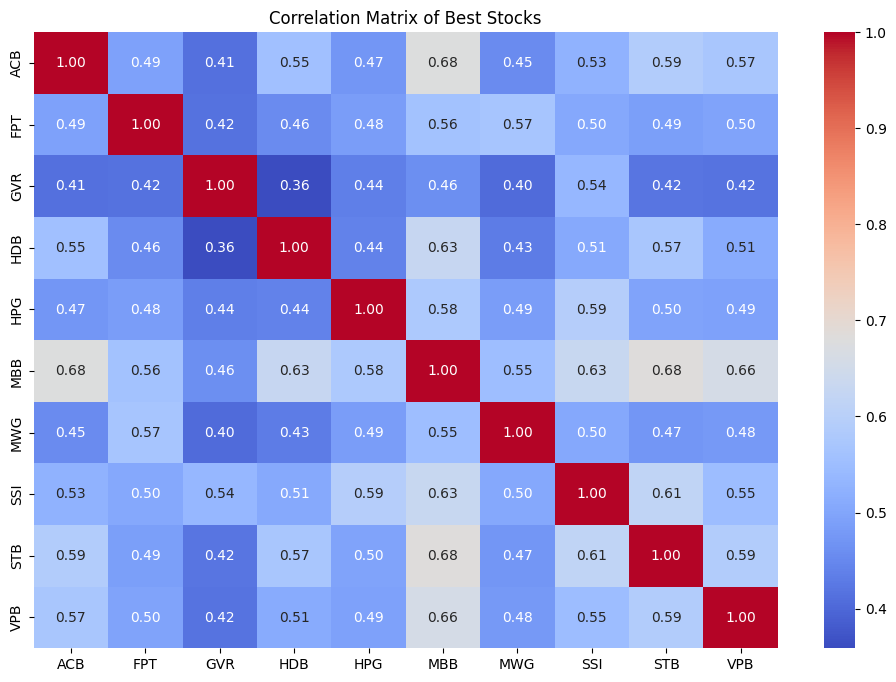

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(stock_10.corr(), annot=True, cmap='coolwarm', fmt= '.2f')
plt.title('Correlation Matrix of Best Stocks')
plt.show()

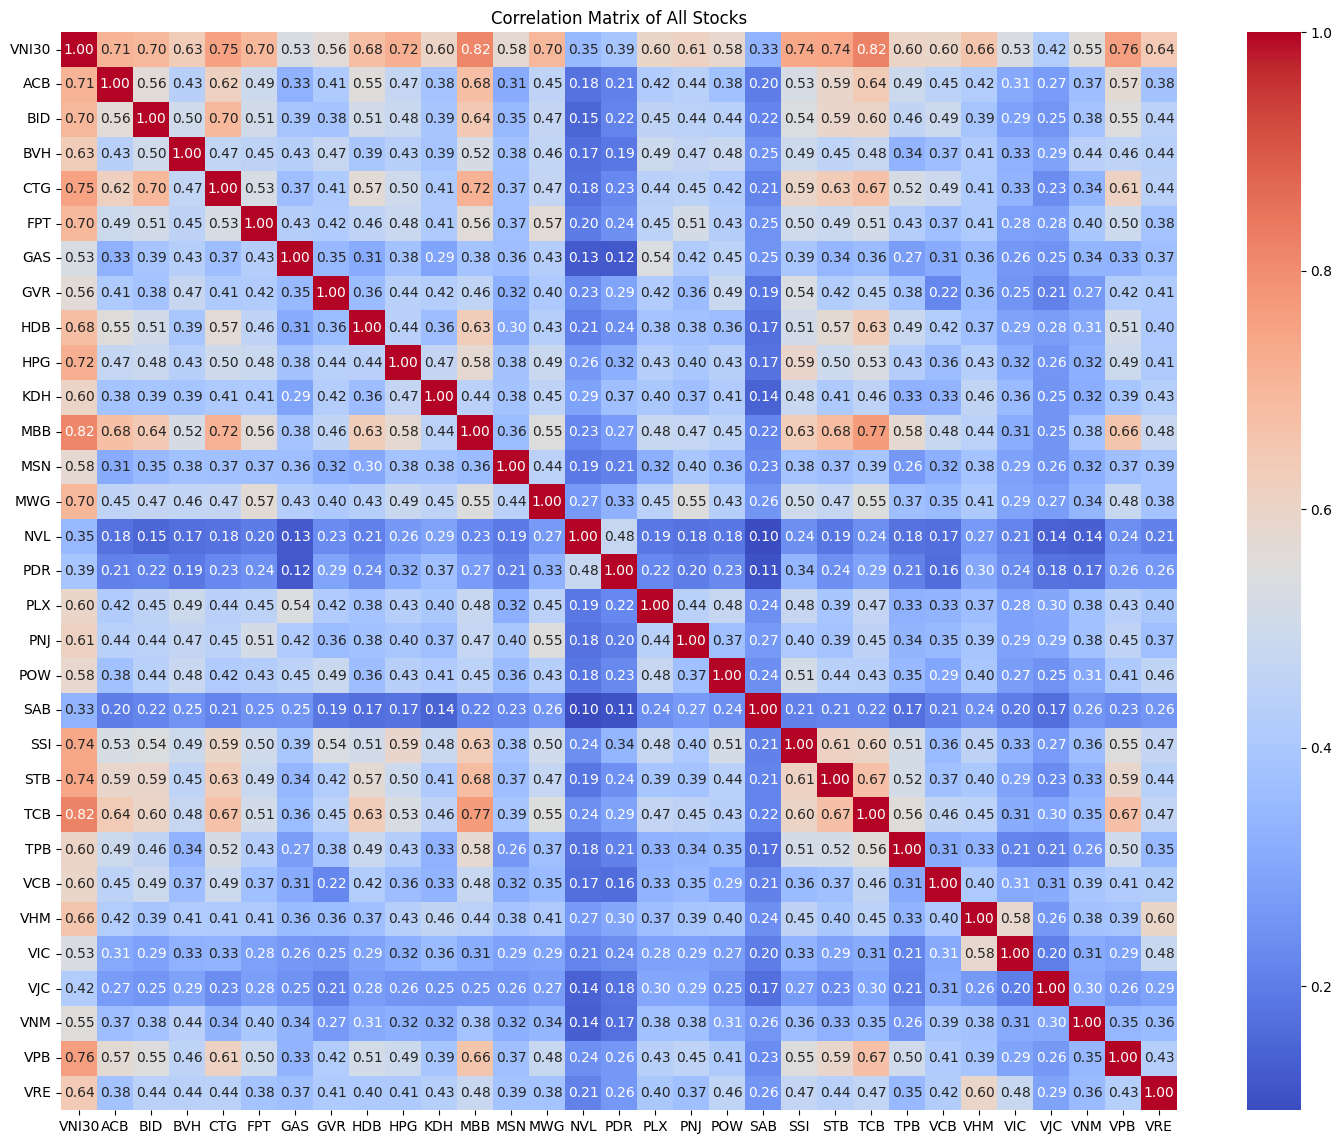

In [24]:
plt.figure(figsize=(18, 14))
sns.heatmap(stock_data_pct_change.corr(), annot=True, cmap='coolwarm', fmt= '.2f')
plt.title('Correlation Matrix of All Stocks')
plt.show()

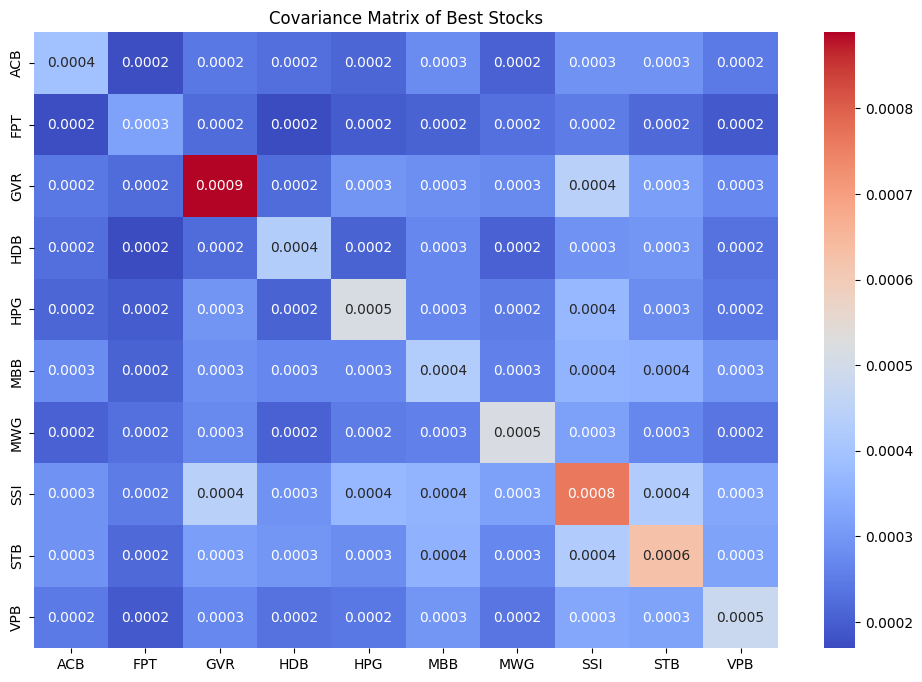

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(stock_10.cov(), annot=True, cmap='coolwarm', fmt= '.4f')
plt.title('Covariance Matrix of Best Stocks')
plt.show()

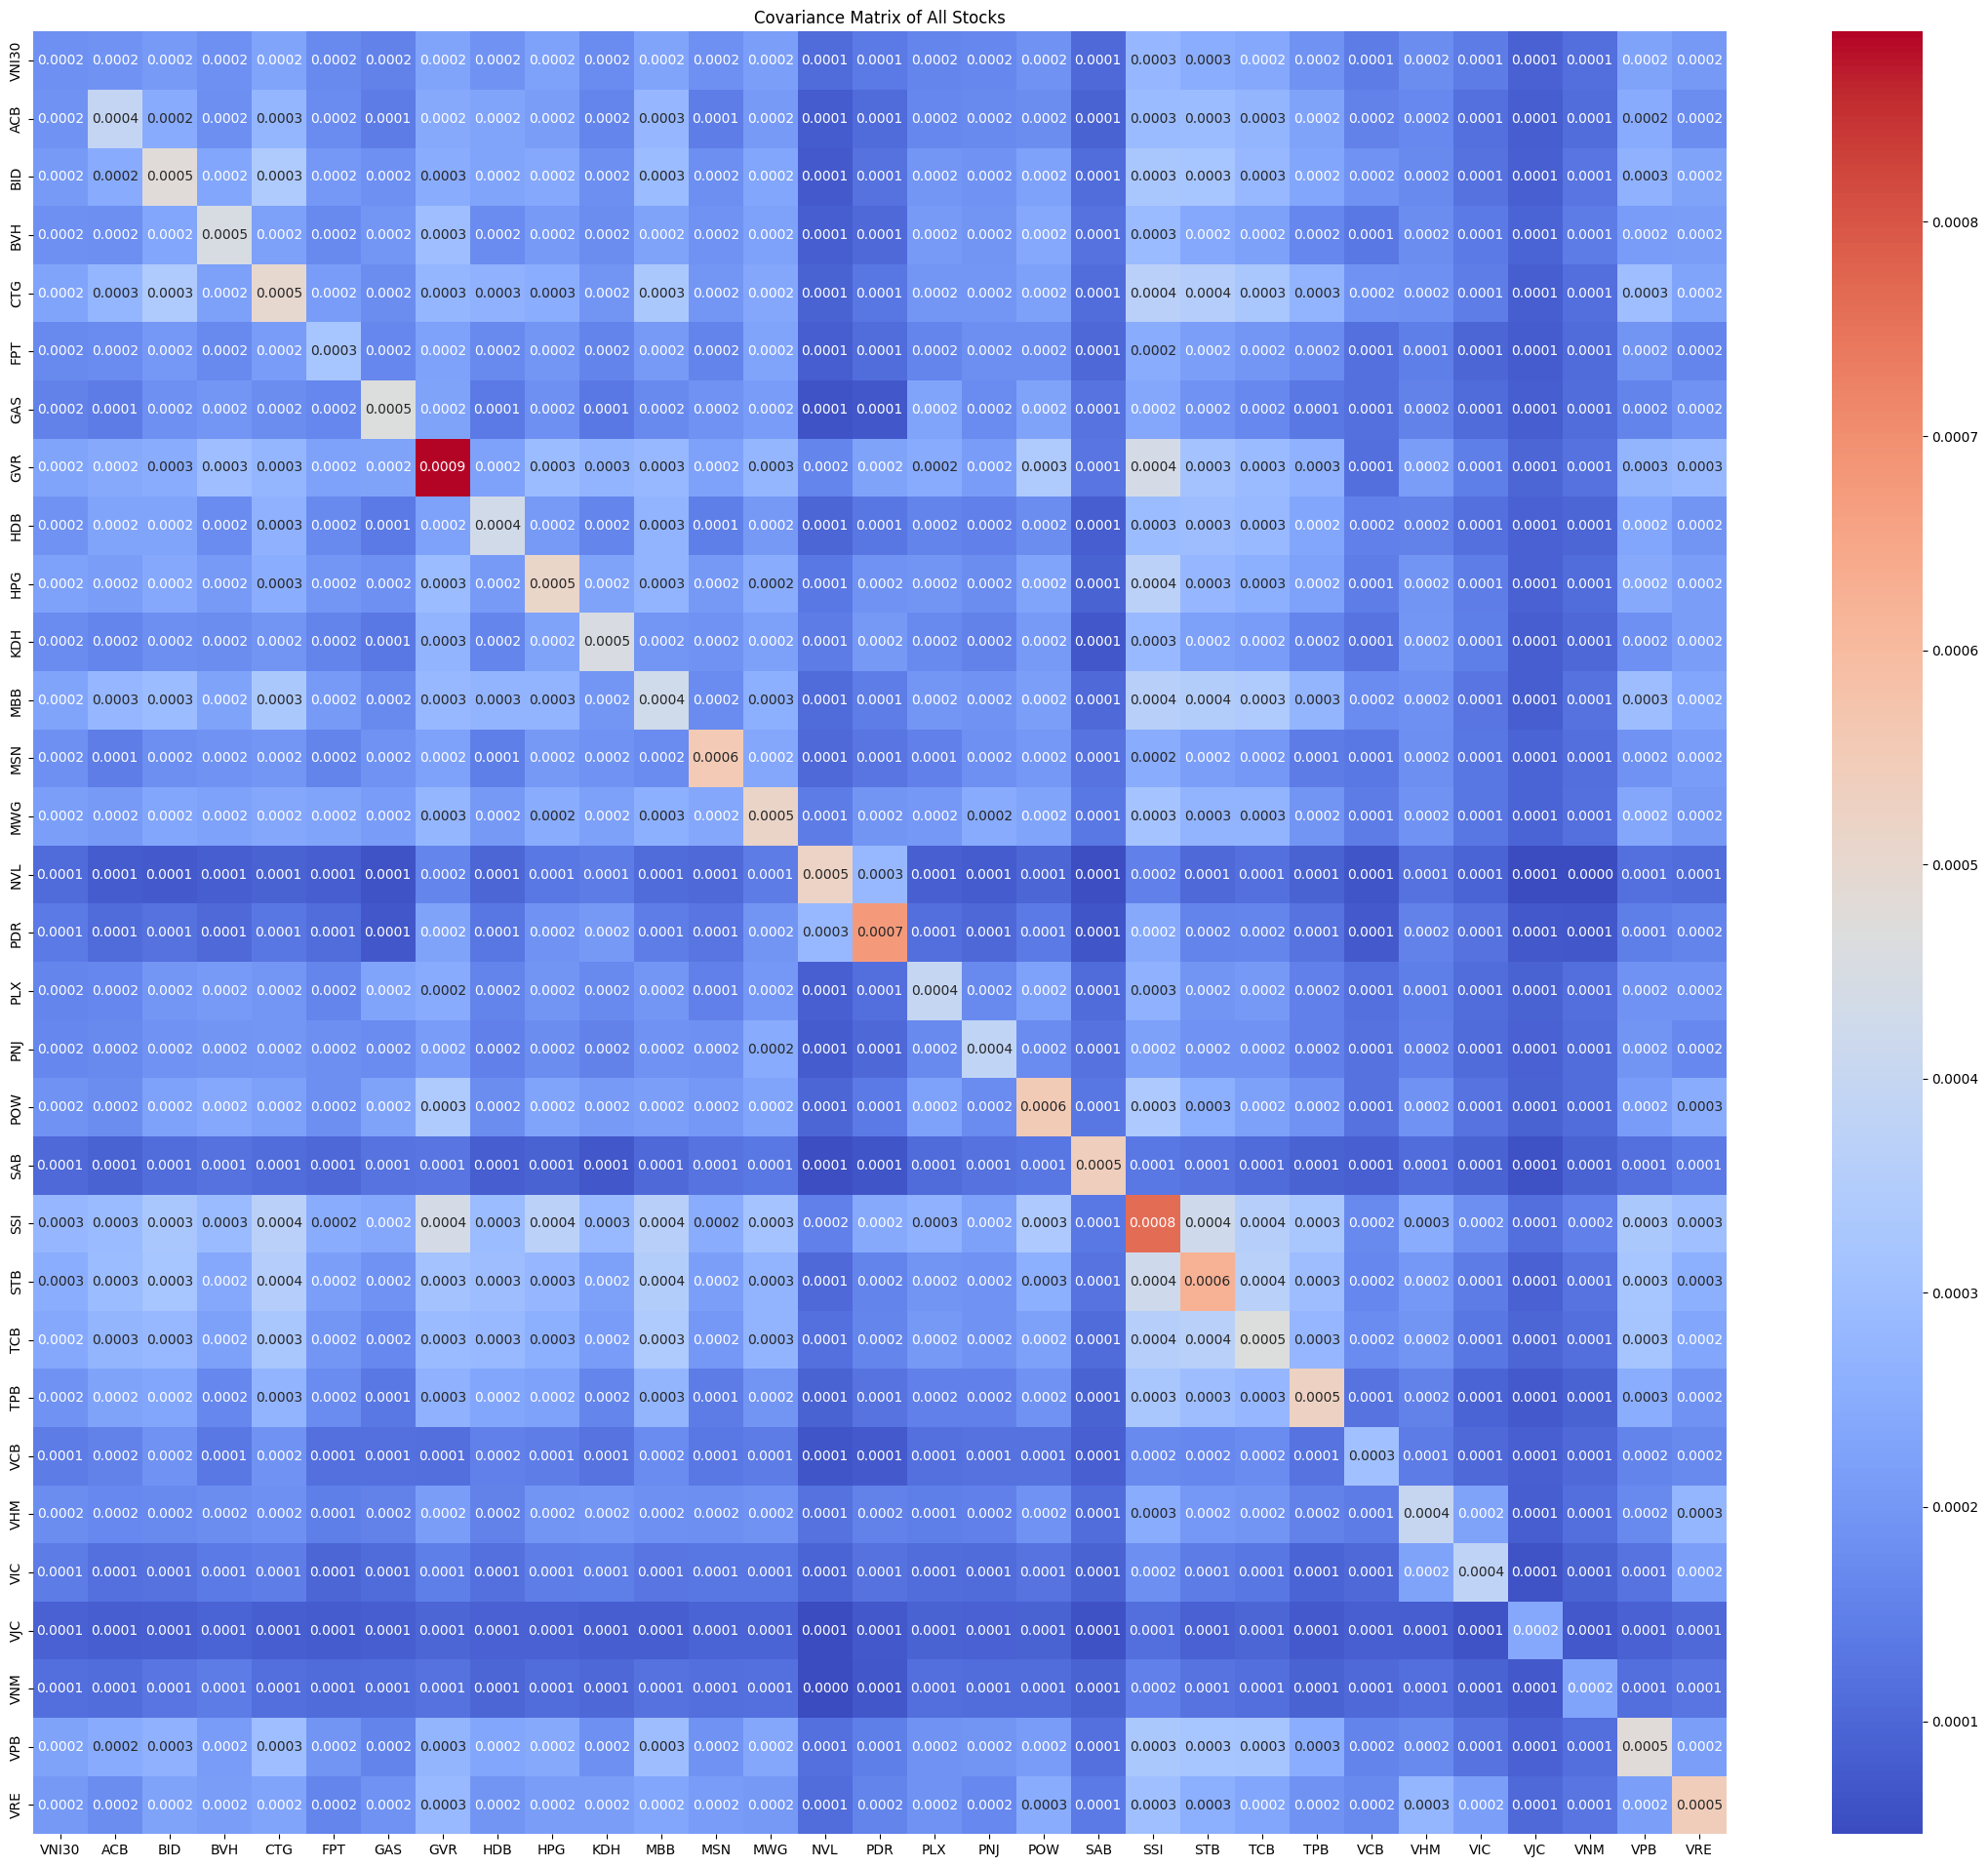

In [26]:
plt.figure(figsize=(28, 24))
sns.heatmap(stock_data_pct_change.cov(), annot=True, cmap='coolwarm', fmt= '.4f')
plt.title('Covariance Matrix of All Stocks')
plt.show()

## Portfolio Optimisation for 10 stocks

### Equal Weight

In [27]:
equal_weight = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
equal_weight = np.array(equal_weight)

In [28]:
equal_weight_port_ret = np.dot(equal_weight, np.mean(stock_10))*252

print('Annualised Portfolio Return:', equal_weight_port_ret)

Annualised Portfolio Return: 0.26592058470202706


c:\Users\Admins\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



In [29]:
equal_weight_port_std = np.sqrt(np.dot(np.dot(equal_weight,stock_10.cov()),np.transpose(equal_weight)))*np.sqrt(252)

print('Annualised Portfolio Volatility:', equal_weight_port_std)

Annualised Portfolio Volatility: 0.2723715492104543


### Portfolio Optimisation applying the Monte Carlo Simulation

In [30]:
num_portfolios = 25000
port_ret = []
port_std = []
port_sharpe_ratio = []
weight_list = []

for i in range(num_portfolios):
  np.random.seed(i)
  weight_10 = np.random.random(10)
  weight_10 = weight_10 / sum(weight_10)
  weight_list.append(weight_10)
  port_ann_ret = np.dot(weight_10,stock_10.mean()) * 252
  port_ann_std = np.sqrt(np.dot(np.dot(weight_10,stock_10.cov()), np.transpose(weight_10))) * np.sqrt(252)
  port_ret.append(port_ann_ret)
  port_std.append(port_ann_std)
  sharpe_ratio_10 = (port_ann_ret - rfr) / port_ann_std
  port_sharpe_ratio.append(sharpe_ratio_10)

In [31]:
max_sharpe_idx = np.argmax(port_sharpe_ratio)
max_sharpe_ratio = port_sharpe_ratio[max_sharpe_idx]
max_sharpe_return = port_ret[max_sharpe_idx]
max_sharpe_std = port_std[max_sharpe_idx]

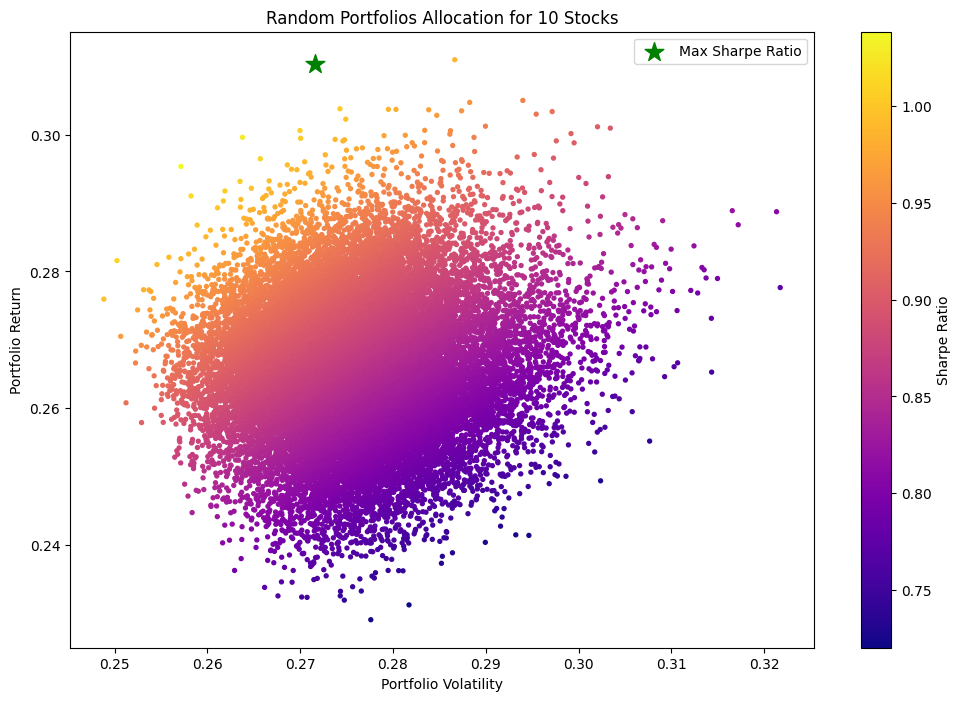

In [32]:
plt.figure(figsize= (12, 8))
scatter = plt.scatter(port_std, port_ret, c= port_sharpe_ratio, cmap= 'plasma', s= 8)
plt.scatter(max_sharpe_std, max_sharpe_return, marker= '*', color= 'green', s= 200, label= 'Max Sharpe Ratio')
plt.title('Random Portfolios Allocation for 10 Stocks')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.legend()
plt.colorbar(scatter, label= 'Sharpe Ratio')
plt.show()

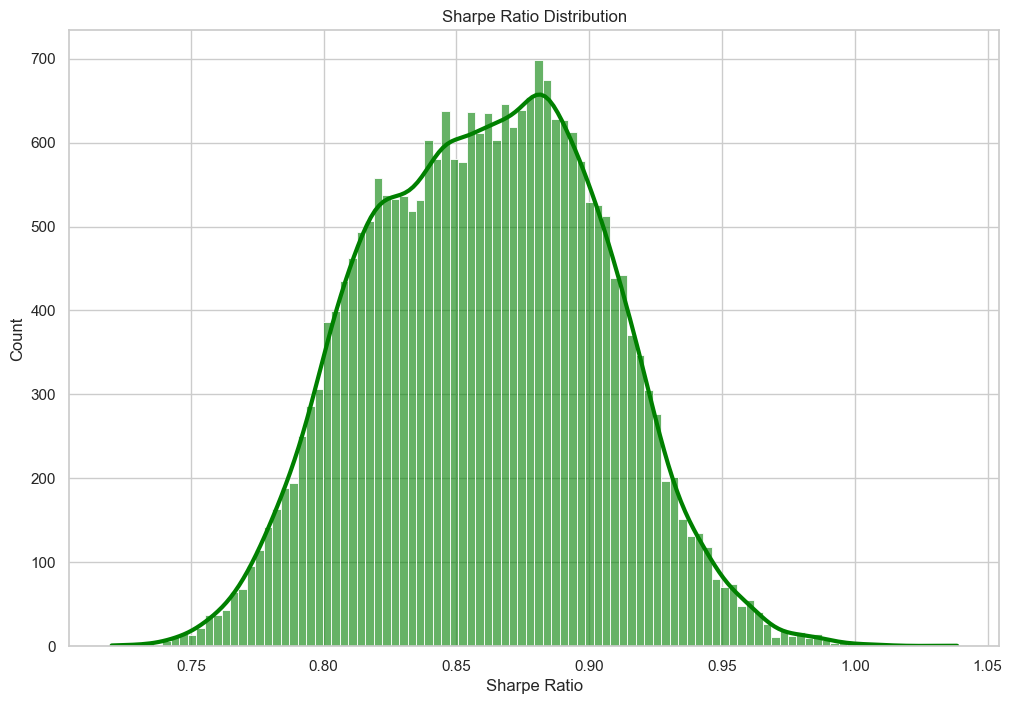

In [33]:
plt.figure(figsize= (12, 8))
sns.set(style= 'whitegrid')
plot = sns.histplot(port_sharpe_ratio, kde= True, bins= 100, color= 'green', line_kws={'linewidth': 3}, alpha=0.6)
plot.set_title('Sharpe Ratio Distribution')
plot.set_xlabel('Sharpe Ratio')
plt.show()

In [34]:
top_sharpe_ratio_10 = np.argsort(port_sharpe_ratio)[::-1]

for i in range(5):
  top_portfolio_index = top_sharpe_ratio_10[i]
  top_sharpe_ratio = port_sharpe_ratio[top_portfolio_index]
  print(f"Top {i+1} Sharpe Ratio: {top_sharpe_ratio}, Portfolio: {top_portfolio_index}")

Top 1 Sharpe Ratio: 1.0385194259185346, Portfolio: 24644
Top 2 Sharpe Ratio: 1.0384657643177666, Portfolio: 9969
Top 3 Sharpe Ratio: 1.028505708005466, Portfolio: 20709
Top 4 Sharpe Ratio: 1.017377295359759, Portfolio: 6166
Top 5 Sharpe Ratio: 1.0120103785922363, Portfolio: 23574


In [35]:
best_port_sharpe_ratio = port_sharpe_ratio[24644]
best_port_weight = pd.DataFrame({'Stock': stock_list_10, 'Weight': weight_list[24644]})
best_port_weight.set_index('Stock', inplace=True)
best_port_weight

Weight
Stock          
ACB    0.001501
FPT    0.344507
GVR    0.256799
HDB    0.128924
HPG    0.088297
MBB    0.080025
MWG    0.026924
SSI    0.015621
STB    0.014385
VPB    0.043017

In [36]:
best_port_weight.transpose().to_csv('weight.csv')

## Portfolio Analysis

In [37]:
final = pd.merge(best_port_weight, result, on= 'Stock', how= 'left')
final

Stock    Weight      Beta  Expected Return
0   ACB  0.001501  1.043761         0.105132
1   FPT  0.344507  0.919854         0.096015
2   GVR  0.256799  1.241661         0.119694
3   HDB  0.128924  1.038103         0.104716
4   HPG  0.088297  1.207159         0.117155
5   MBB  0.080025  1.241945         0.119715
6   MWG  0.026924  1.173296         0.114663
7   SSI  0.015621  1.509268         0.139385
8   STB  0.014385  1.373873         0.129422
9   VPB  0.043017  1.226375         0.118569

In [38]:
best_port_beta = (final['Weight'] * final['Beta']).sum()
best_port_expected_return = (final['Weight'] * final['Expected Return']).sum()
print('Beta of portfolio:', best_port_beta)
print('Expected Return of portfolio:', best_port_expected_return)

Beta of portfolio: 1.1048160296150806
Expected Return of portfolio: 0.10962453808206711


In [39]:
daily_returns = []
for date, pct_change_row in stock_data_pct_change.iterrows():
    selected_pct_change = pct_change_row.loc[best_port_weight.index]
    weighted_returns = selected_pct_change * best_port_weight['Weight']
    daily_return = weighted_returns.sum()
    daily_returns.append(daily_return)

daily_best_port = pd.DataFrame(daily_returns, index=stock_data_pct_change.index, columns=['Daily Portfolio Return'])
daily_best_port

Daily Portfolio Return
Date                              
2019-06-04               -0.001710
2019-06-05                0.001569
2019-06-06                0.020037
2019-06-07                0.032093
2019-06-10               -0.010158
...                            ...
2024-05-27                0.007439
2024-05-28                0.017740
2024-05-29               -0.015716
2024-05-30                0.001934
2024-05-31               -0.005177

[1250 rows x 1 columns]

In [40]:
best_port_ann_ret = daily_best_port.mean() * 252
best_port_ann_std = daily_best_port.std() * np.sqrt(252)

best_port_ann_ret = best_port_ann_ret.item()
best_port_ann_std = best_port_ann_std.item()

print('Annualised Return of portfolio:', best_port_ann_ret)
print('Annualised Volatility of portfolio:', best_port_ann_std)

Annualised Return of portfolio: 0.31040085896430347
Annualised Volatility of portfolio: 0.27160864970322685


In [41]:
# Portfolio Metrics
print("Portfolio metrics:")
print("Annualised Return: {:.4f}".format(best_port_ann_ret))
print("Annualised Volatility: {:.4f}".format(best_port_ann_std))
print("Sharpe Ratio: {:.4f}".format(best_port_sharpe_ratio))
print("Beta: {:.4f}".format(best_port_beta))
print("Expected Return: {:.4f}".format(best_port_expected_return))

Portfolio metrics:
Annualised Return: 0.3104
Annualised Volatility: 0.2716
Sharpe Ratio: 1.0385
Beta: 1.1048
Expected Return: 0.1096
